In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('winequality.csv')

In [3]:
data.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [4]:
set(data.quality)

{3, 4, 5, 6, 7, 8, 9}

In [5]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
data['fixed acidity'].fillna(7.2)

0       7.0
1       6.3
2       8.1
3       7.2
4       7.2
       ... 
6492    6.2
6493    5.9
6494    6.3
6495    5.9
6496    6.0
Name: fixed acidity, Length: 6497, dtype: float64

In [7]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [12]:
data.dropna(inplace=True)

**outliers**

In [11]:
from scipy import stats

In [13]:
data.drop(columns=['type'],inplace=True)

In [14]:
z=np.abs(stats.zscore(data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.167786          0.422710     0.283959        3.207420   0.315228   
1          0.707155          0.240479     0.146257        0.808151   0.201180   
2          0.679794          0.361966     0.559363        0.306117   0.172668   
3          0.013681          0.665684     0.008554        0.642500   0.055427   
4          0.013681          0.665684     0.008554        0.642500   0.055427   
...             ...               ...          ...             ...        ...   
6491       0.321892          1.703315     1.643871        0.745079   0.340545   
6492       0.784208          1.581828     1.643871        0.724055   0.967807   
6494       0.707155          1.035136     1.299616        0.660984   0.568640   
6495       1.015366          1.855174     1.368467        0.724055   0.540129   
6496       0.938313          0.179735     1.041320        0.387673   0.312034   

      free sulfur dioxide  

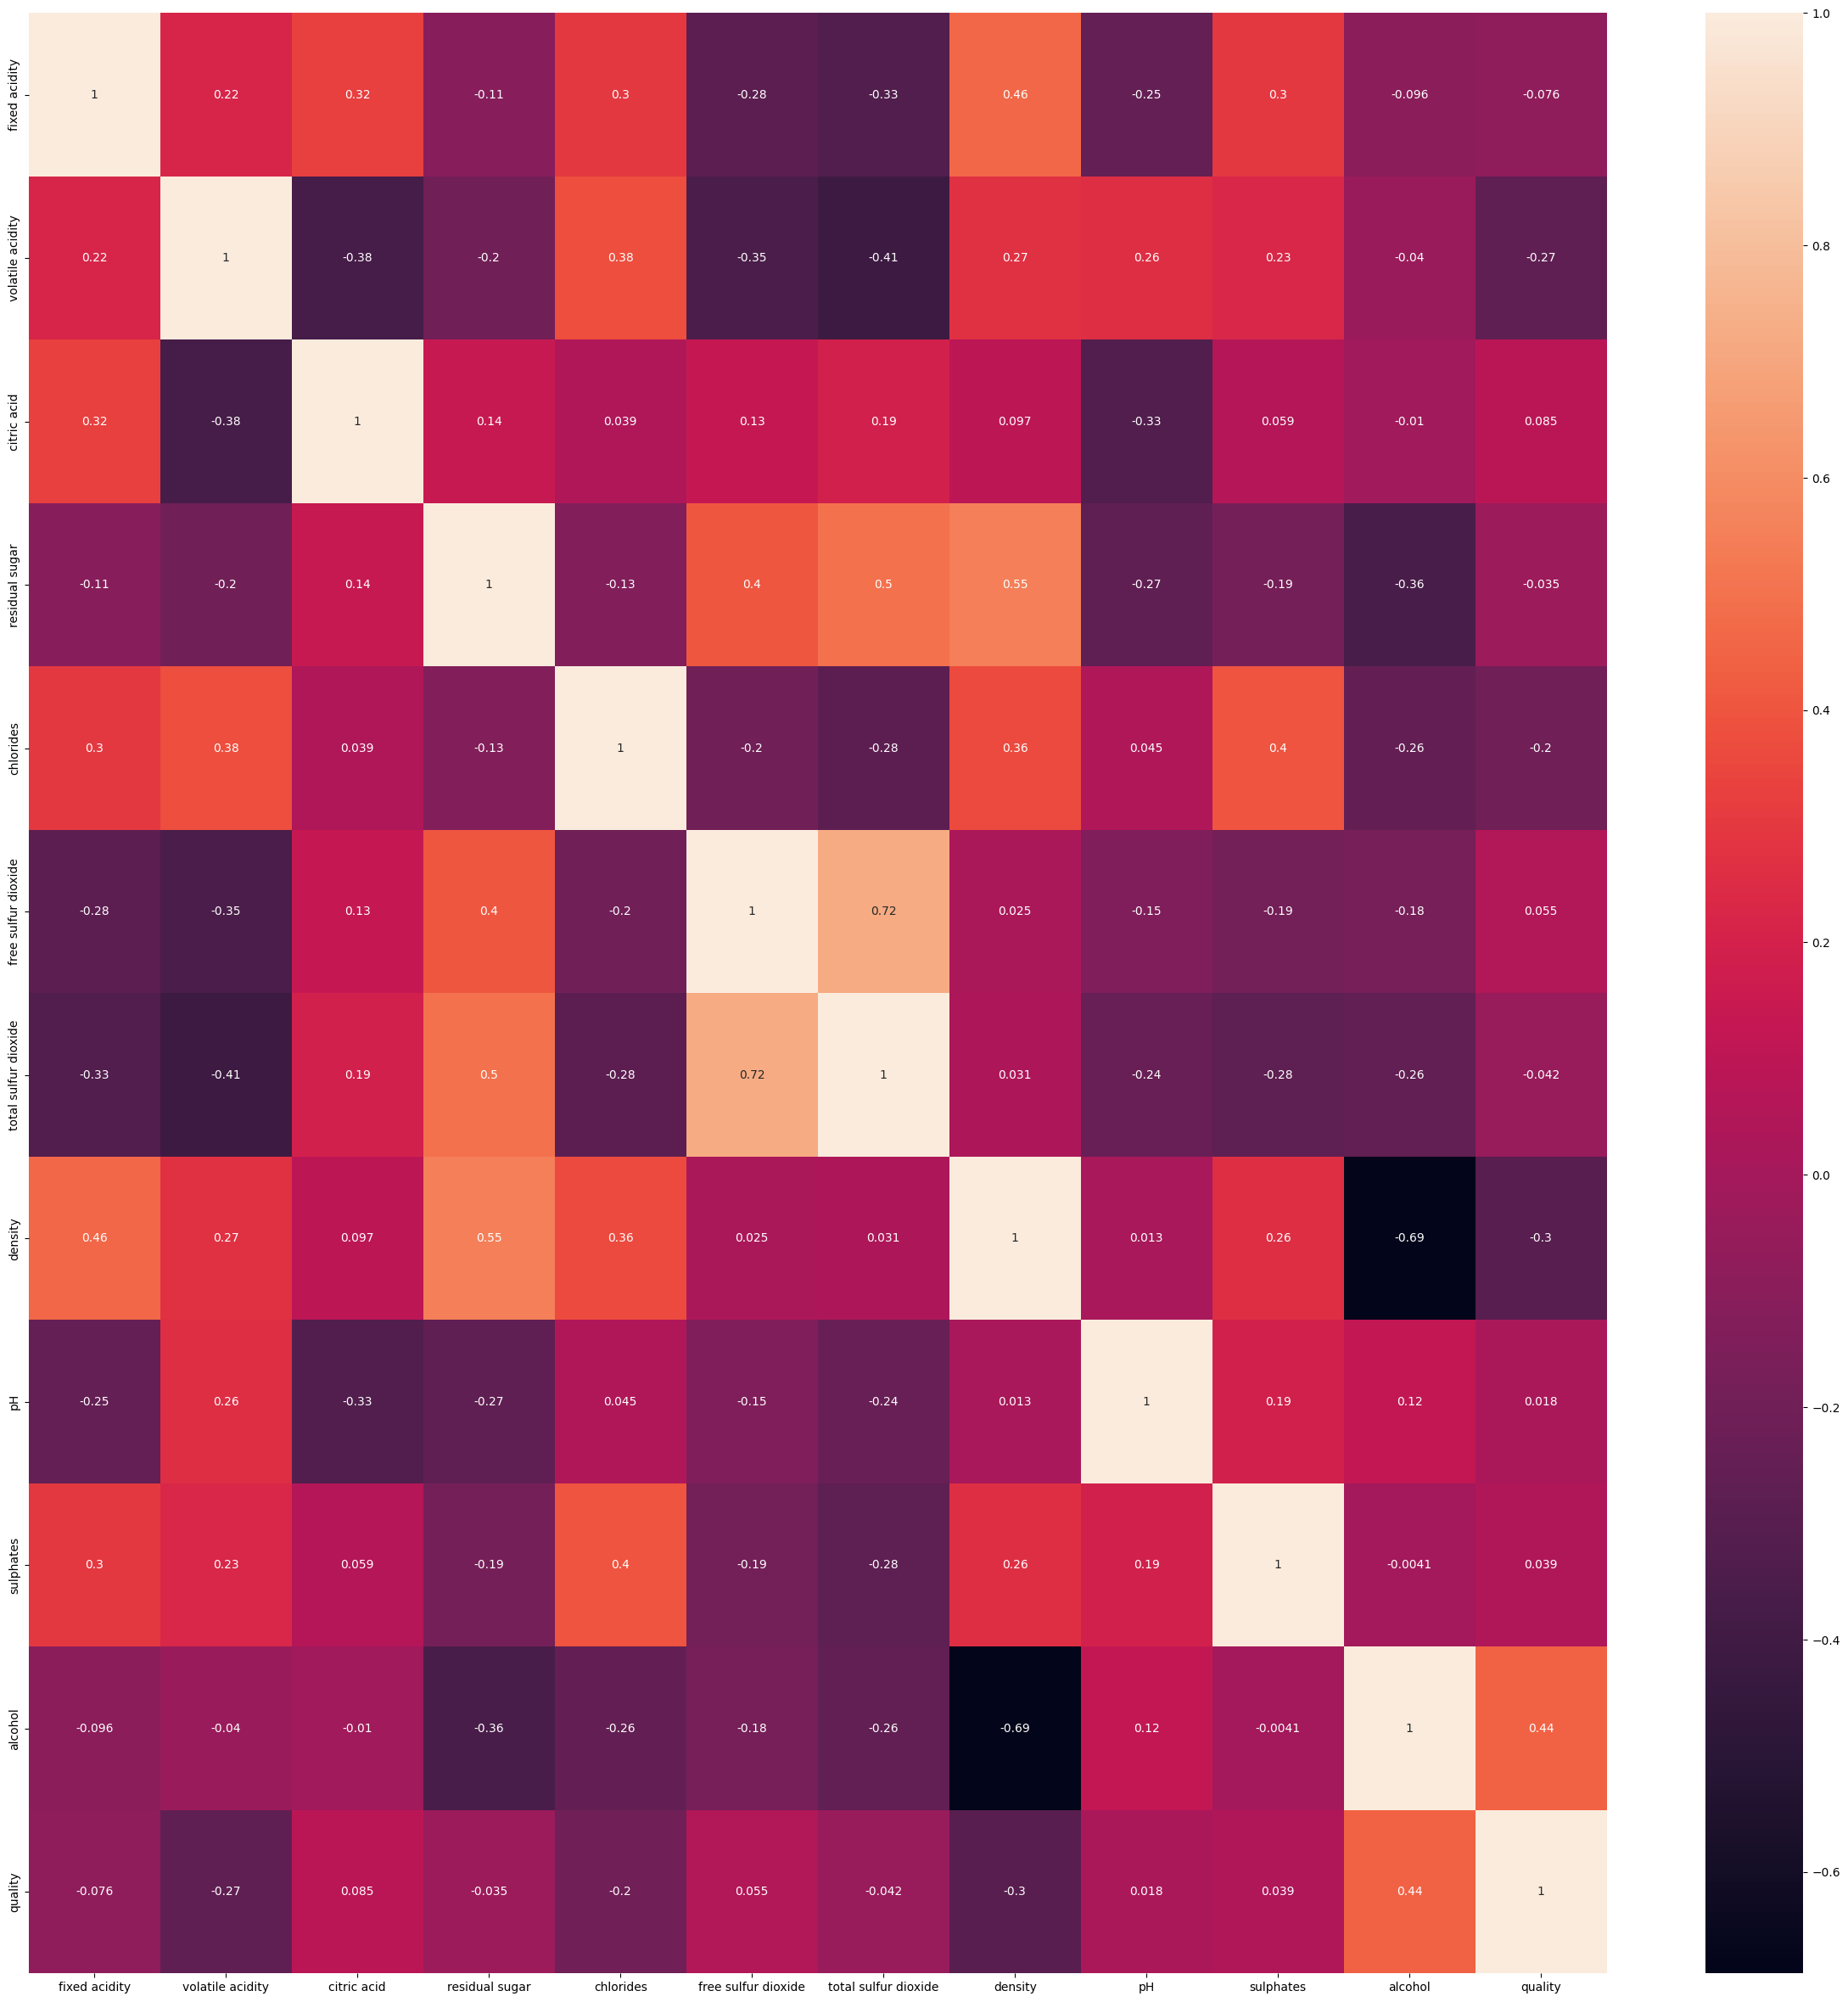

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(30,30))
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.show()
plt.savefig('corr.png')

In [16]:
new_data=data[(z<3).all(axis=1)]

In [17]:
new_data.shape

(5955, 12)

In [18]:
data.shape

(6463, 12)

In [19]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**SPlitting the data into x and y**

In [20]:
from sklearn.model_selection import train_test_split
X=new_data.drop(columns=['quality'])
Y=new_data['quality']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.05)

**Data Modelling**

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=100)


In [23]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

**Predicting the Quality**

In [25]:
y_pred=rf_model.predict(x_test)


**Accuracy**

In [34]:
def accuracy(y,yp):
    cnt=0
    i=0
    for el in y:
        if el==yp[i]:
            cnt=cnt+1
        i=i+1
    return cnt/l

acc=accuracy(y_test,y_pred)
print(f"the accuarcy of model is {round(acc,2)*100}%")


the accuarcy of model is 71.0%


In [33]:
def predict(alcohol,acid,v_acid,c_acid,sugar=1.4,chl=0.036,sulf=42.0,t_sulf=109.0,density=0.99,ph=3.31,sulp=0.62):
    df=pd.DataFrame({"fixed acidity":[acid],"volatile acidity":[v_acid],"citric acid":[c_acid],	"residual sugar":[sugar],
                     "chlorides":[chl],"free sulfur dioxide":[sulf],
                     "total sulfur dioxide":[t_sulf],"density":[density],"pH":[ph],"sulphates":[sulp],"alcohol":[alcohol]})
    e=rf_model.predict(df)
    return e[0]

p=predict(alcohol=11.6,acid=7.0,v_acid=0.30,c_acid=0.40,sugar=1.4)
print(f"my prediction of quality of wine is {p}")

my prediction of quality of wine is 6
